# PROJECT SHOPPERS SPECTRUM
1. Import all the necessary Libraries
2. Load the data set
3. Check basic information for understanding the data
4. Check for Null and Duplicate values (Data Cleaning)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib
!pip install streamlit pandas scikit-learn joblib
import streamlit as st
!pip uninstall streamlit
!pip install streamlit
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster

Defaulting to user installation because normal site-packages is not writeable


In [7]:
#Load Dataset
df = pd.read_csv("online_retail.csv")

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
#Check basic details about the data
print("Shape:", df.shape)
print("Info:", df.info())

#Check for Nulls and Duplicates
print("Nulls:", df.isnull().sum())
print("Duplicates:", df.duplicated().sum())



Shape: (541909, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
Info: None
Nulls: InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
Duplicates: 5268


In [15]:
#Drop rows with missing customer ID
df = df[~df['CustomerID'].isnull()]

#Remove cancelled invoices
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

#Remove rows with non-positive Quantity or Unit Price
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

#Reset index after cleaning
df.reset_index(drop = True, inplace = True)

print(df.shape)
print(df.describe())

(397884, 8)
            Quantity      UnitPrice     CustomerID
count  397884.000000  397884.000000  397884.000000
mean       12.988238       3.116488   15294.423453
std       179.331775      22.097877    1713.141560
min         1.000000       0.001000   12346.000000
25%         2.000000       1.250000   13969.000000
50%         6.000000       1.950000   15159.000000
75%        12.000000       3.750000   16795.000000
max     80995.000000    8142.750000   18287.000000


In [21]:
#Rechecking if we have any Nulls
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# Lets begin with Exploratory Data Analysis

In [28]:
#Total transactions per country
country_txn = df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending = False)
country_txn

Country
United Kingdom          16646
Germany                   457
France                    389
EIRE                      260
Belgium                    98
Netherlands                94
Spain                      90
Australia                  57
Portugal                   57
Switzerland                51
Finland                    41
Italy                      38
Norway                     36
Sweden                     36
Channel Islands            26
Poland                     19
Japan                      19
Denmark                    18
Austria                    17
Cyprus                     16
Unspecified                 8
Iceland                     7
Singapore                   7
Canada                      6
Malta                       5
Israel                      5
Greece                      5
USA                         5
Lithuania                   4
European Community          4
United Arab Emirates        3
Czech Republic              2
Bahrain                     2
Le

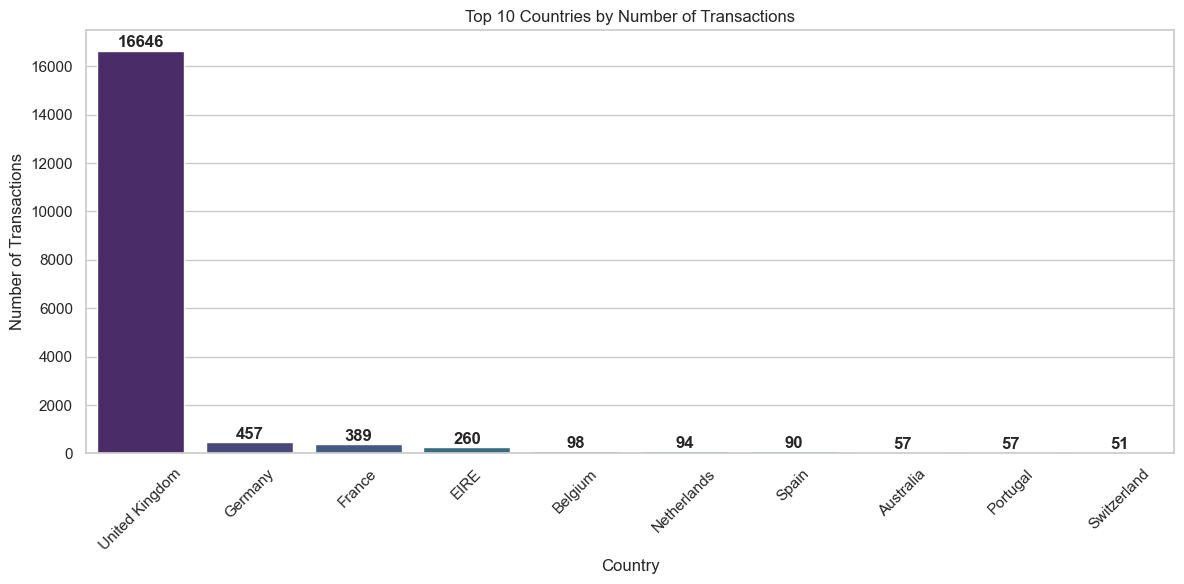

In [34]:
plt.figure(figsize=(12,6))
sns.set(style="whitegrid")

# Plot the barplot
ax = sns.barplot(x=country_txn.index[:10], y=country_txn.values[:10], palette="viridis")
plt.title("Top 10 Countries by Number of Transactions")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)

# Add value labels above bars
for i, value in enumerate(country_txn.values[:10]):
    ax.text(i, value + 5, str(value), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

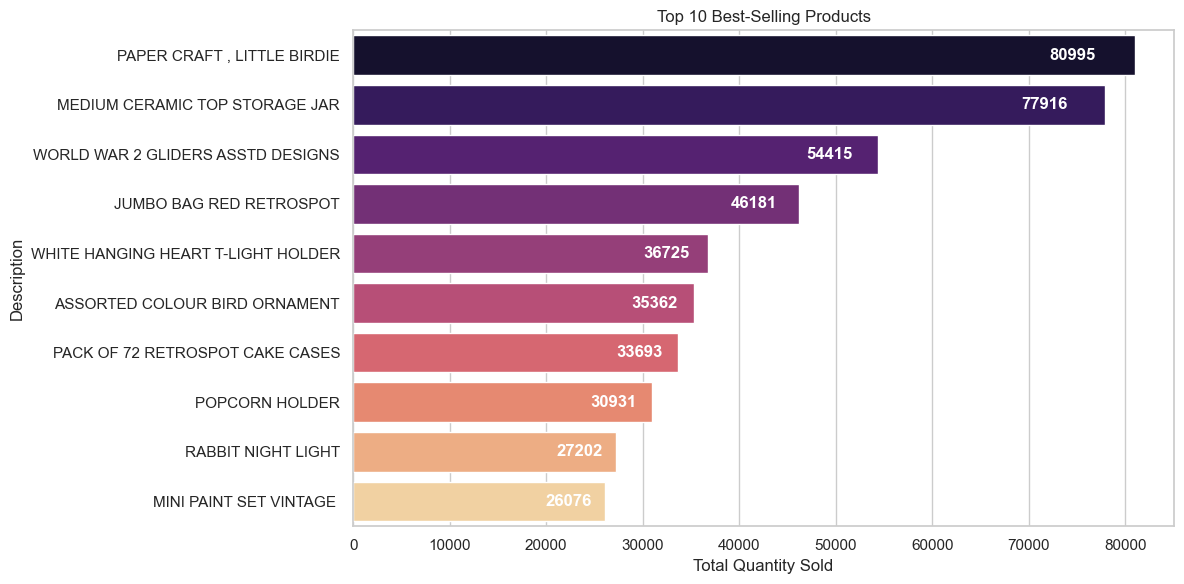

In [38]:
# Top 10 products by quantity sold
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

#Visualization for Top 10 Best selling products
plt.figure(figsize=(12,6))
sns.set(style="whitegrid")

ax = sns.barplot(x=top_products.values, y=top_products.index, palette="magma")
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Total Quantity Sold")

# Add value labels inside the bars
for i, (value, name) in enumerate(zip(top_products.values, top_products.index)):
    ax.text(value - (value * 0.05), i, str(value), color='white', va='center', ha='right', fontweight='bold')

plt.tight_layout()
plt.show()

In [44]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

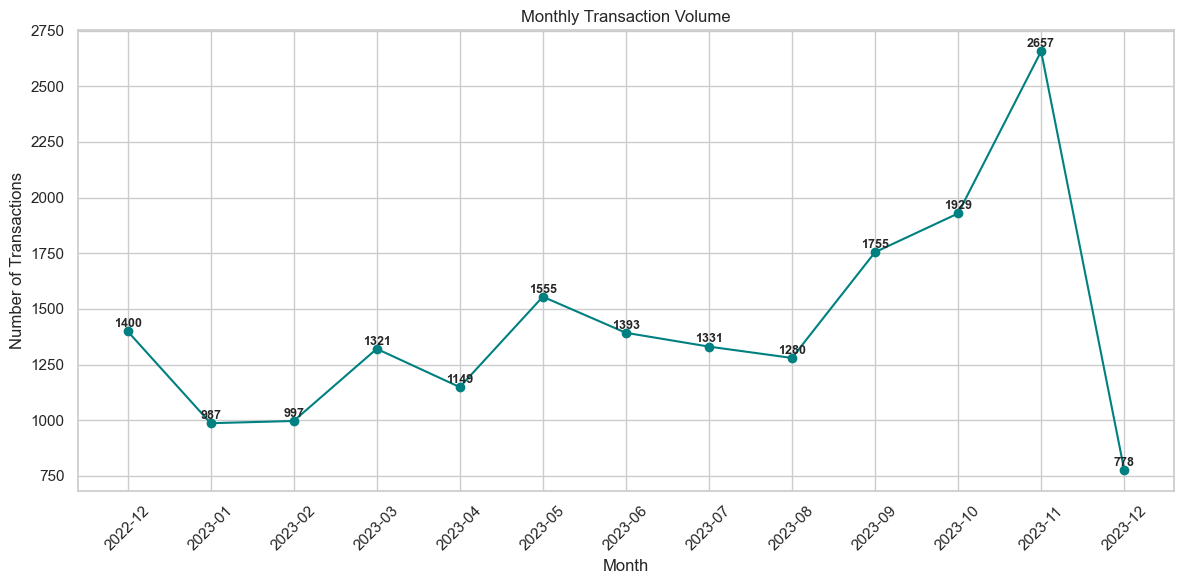

In [46]:
# Convert Period to string for plotting
monthly_sales.index = monthly_sales.index.astype(str)

# Plot the line chart
plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='teal')
plt.title("Monthly Transaction Volume")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.grid(True)

# Add labels above each point
for i, value in enumerate(monthly_sales.values):
    plt.text(i, value + 5, str(value), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

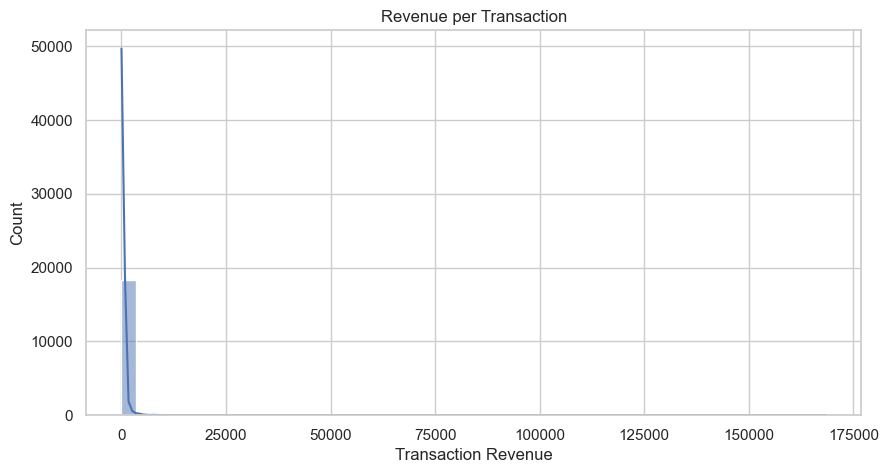

In [58]:
# Total revenue per transaction
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
txn_revenue = df.groupby('InvoiceNo')['TotalPrice'].sum()

plt.figure(figsize=(10,5))
sns.histplot(txn_revenue, bins=50, kde=True)
plt.title("Revenue per Transaction")
plt.xlabel("Transaction Revenue")
plt.show()

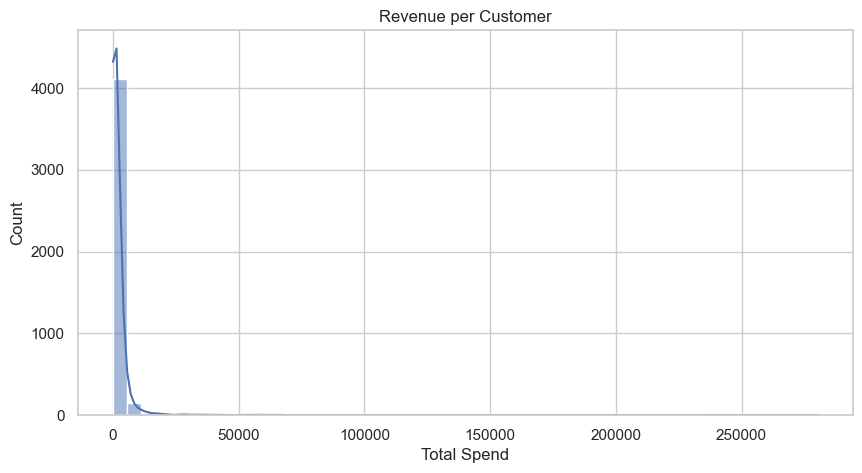

In [60]:
# Revenue per customer
cust_revenue = df.groupby('CustomerID')['TotalPrice'].sum()

plt.figure(figsize=(10,5))
sns.histplot(cust_revenue, bins=50, kde=True)
plt.title("Revenue per Customer")
plt.xlabel("Total Spend")
plt.show()

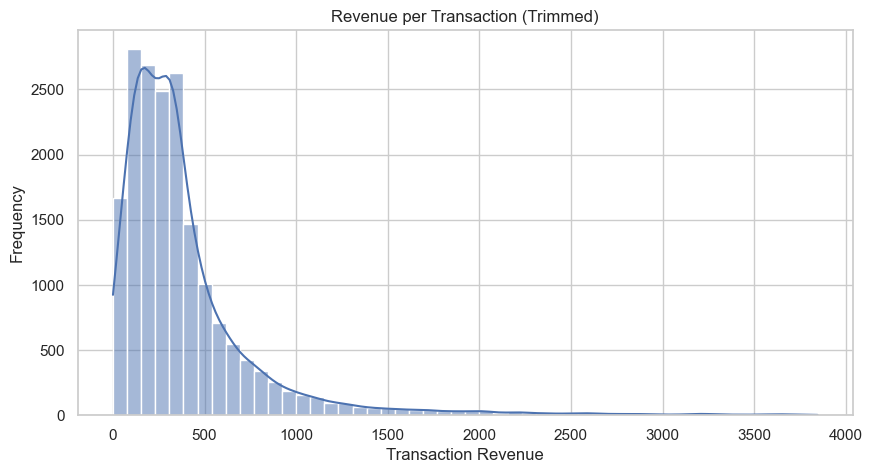

In [68]:
#Trying to trim the details for better Visualization

# Cap top 1% for transaction revenue
txn_cap = txn_revenue[txn_revenue < txn_revenue.quantile(0.99)]

plt.figure(figsize=(10,5))
sns.histplot(txn_cap, bins=50, kde=True)
plt.title("Revenue per Transaction (Trimmed)")
plt.xlabel("Transaction Revenue")
plt.ylabel("Frequency")
plt.show()

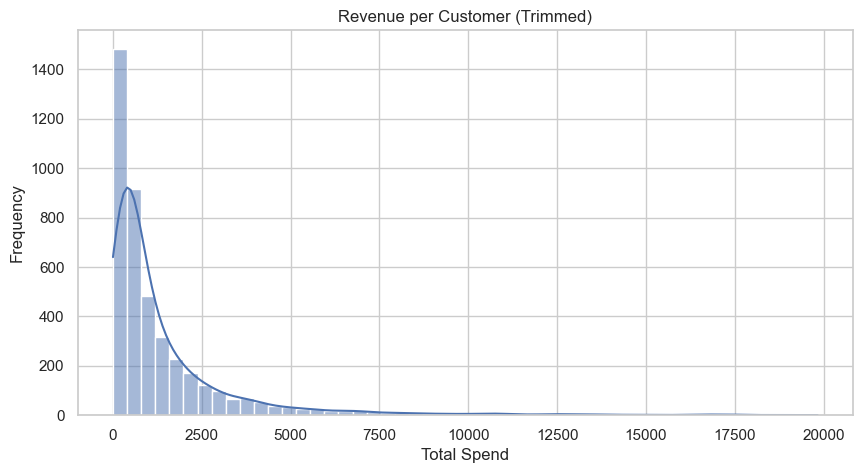

In [70]:
# Cap top 1% for customer revenue
cust_cap = cust_revenue[cust_revenue < cust_revenue.quantile(0.99)]

plt.figure(figsize=(10,5))
sns.histplot(cust_cap, bins=50, kde=True)
plt.title("Revenue per Customer (Trimmed)")
plt.xlabel("Total Spend")
plt.ylabel("Frequency")
plt.show()

# RFM calculation

In [75]:
#Ensuring InvoiceDate is datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

#Reference date for recency
ref_date = df['InvoiceDate'].max()
print('Reference Date:', ref_date)

Reference Date: 2023-12-09 12:50:00


In [77]:
#Group by CustomerID and then calculating RFM
rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (ref_date - x.max()).days,
                                    'InvoiceNo': 'nunique',
                                    'TotalPrice': 'sum'
                                   }).reset_index()

#Renaming columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

#Preview of the data
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,1,7,4310.00
2,12348.0,74,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,309,1,334.40


#Lets understand the above table and trying to segment the customer for easier understanding
Column Meanings:
1. CustomerID: Unique identifier of the customer.
2. Recency: Number of days since the last purchase.
3. Frequency: Number of unique purchases/invoices made.
4. Monetary: Total amount spent by the customer

Row-by-Row Interpretation:
 *Row 0:* Customer 12346.0,
 Recency = 325 days ago -> hasn’t bought in a long time,
 Frequency = 1 -> only one purchase,
 Monetary = ₹77,183.60 -> big spender, but inactive,
 Segment: Potential VIP churn — valuable but disengaged

 *Row 1:* Customer 12347.0,
 Recency = 1 day ago -> very recent,
 Frequency = 7 -> high loyalty,
 Monetary = ₹4,310 -> moderate spender,
 Segment: High-Value Customer

 *Row 2:* Customer 12348.0,
 Recency = 74 days,
 Frequency = 4,
 Monetary = 1797.24,
 Segment = Regular and mid-tier customer,

 *Row 3:* Customer 12349.0,
 Recency = 18 days,
 Frequency = 1,
 Monetary = 1757.55,
 Segment = Made only one fairly recent purchase

 *Row 4:* Customer 12350.0,
 Recency = 309 days ago -> long time ago,
 Frequency = 1,
 Monetary = 334.40,
 Segment = Low-value customer,

# Business Use of RFM
These metrics help businesses:
1. Target high-frequency recent buyers with loyalty rewards.
2. Re-engage at-risk but once-valuable customers.
3. Drop low-value, low-frequency segments from campaigns

# Normalizing RFM Features

In [85]:
# Create a copy of RFM for clustering
rfm_clustering = rfm.copy()

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform RFM columns
rfm_scaled = scaler.fit_transform(rfm_clustering[['Recency', 'Frequency', 'Monetary']])

# Convert back to DataFrame for readability
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])
rfm_scaled_df.head()

,Recency,Frequency,Monetary
0,2.334574,-0.425097,8.358668
1,-0.905340,0.354417,0.250966
2,-0.175360,-0.035340,-0.028596
3,-0.735345,-0.425097,-0.033012
4,2.174578,-0.425097,-0.191347


# Using Elbow Method to identify where the inertia drops sharply

<function matplotlib.pyplot.show(close=None, block=None)>

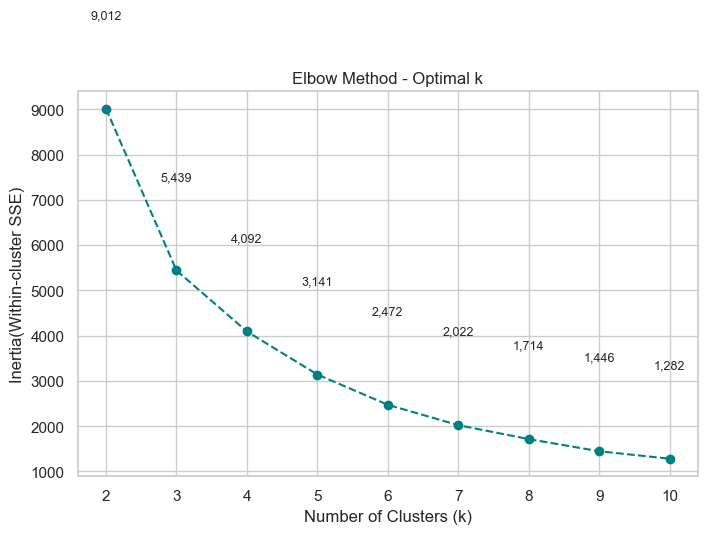

In [94]:
inertia = []

#Trying k from 2 to 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state = 42)
    kmeans.fit(rfm_scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize = (8,5))
plt.plot(range(2,11), inertia, marker = 'o', linestyle = '--', color = 'teal')
plt.title('Elbow Method - Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia(Within-cluster SSE)')
plt.grid(True)

for i , val in enumerate(inertia):
    plt.text(i + 2, val + 2000, f"{int(val):,}", ha = 'center', fontsize = 9)

plt.show

# Using Silhouette score for checking quality of cluster

<function matplotlib.pyplot.show(close=None, block=None)>

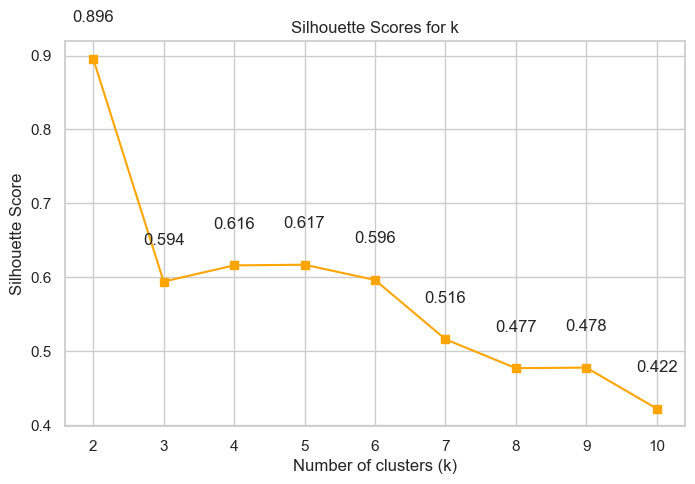

In [105]:
silhouette_scores = []

for k in range (2, 11):
    kmeans = KMeans(n_clusters=k, random_state = 42)
    kmeans.fit(rfm_scaled_df)
    score  = silhouette_score(rfm_scaled_df, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize = (8,5))
plt.plot(range(2, 11), silhouette_scores, marker = 's', linestyle = '-', color = 'orange')
plt.title('Silhouette Scores for k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')

for i, val in enumerate(silhouette_scores):
    plt.text(i + 2, val + 0.05, f"{val:.3f}", ha = 'center')

plt.grid(True)
plt.show

#Elbow method chart:
- It shows Inertia(within-cluster SSE) decreases as k increases
- We need to look at the 'elbow' point where the drop slows significantly
- Steep drop from k=2, k=3, k=4, k=5
- At k=5, the curve flattens, which will be our 'elbow' point. Beyond that, improvement is marginal
- k=5 is the elbow point, best trade-off between performance and complexity

#Silhouette Score chart:
- It shows how well-seperated and cohesive the clusters are
- Higher score = better-defined clusters
- Best Silhouette score after k=2 is at k=5, making it a strong candidate

#Since the best Silhouette score is at k=5 after k=2, we will use k=5 for clusters
- Elbow curve: Visible flattening at k=5
- Silhouette score: Best quality after k=2
- It also aligns well with business logic (we can label them like 'High-value', 'Regular', 'Occasional', 'At-risk')     |


# Now lets run kmeans and add cluster labels

In [113]:
kmeans = KMeans(n_clusters=5, random_state = 42)
kmeans.fit(rfm_scaled_df)

rfm['Cluster'] = kmeans.labels_

rfm.head()

,CustomerID,Recency,Frequency,Monetary,Clusters,Cluster
0,12346.0,325,1,77183.60,4,4
1,12347.0,1,7,4310.00,0,0
2,12348.0,74,4,1797.24,0,0
3,12349.0,18,1,1757.55,0,0
4,12350.0,309,1,334.40,1,1


In [115]:
#Grouping by clusters
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'}).rename(columns={'CustomerID': 'Count'}).round(1)

cluster_summary = cluster_summary.sort_values(by = 'Monetary', ascending = False)

cluster_summary

,Recency,Frequency,Monetary,Count
Cluster,,,,
3,6.7,42.8,190863.5,6
2,0.5,135.8,58381.1,6
4,14.8,22.3,13576.5,202
0,42.7,3.7,1361.0,3057
1,247.1,1.6,480.6,1067


# Lets understand the table
 *Cluster 3*,
 Recency: 6.7,
 Frequency: 42.8,
 Monetary: 190863.5,
 Count: 6,
 Segment: Top VIPs - Recent, loyal and Ultra high spenders

 *Cluster 2*,
 Recency: 0.5,
 Frequency: 135.8,
 Monetary: 58381.1,
 Count: 6,
 Segment: Loyal Whales - Hyperactive customers, highest frequency, great value for the business

 *Cluster 4*
 Recency: 14.8,
 Frequency: 22.3,
 Monetary: 13576.5,
 Count: 202,
 Segment: High-value - regular, recent customers

  *Cluster 0*
 Recency: 42.7,
 Frequency: 3.7,
 Monetary: 1361.0,
 Count: 3057,
 Segment: Low Engagement - many customers, but low spend/frequency

  *Cluster 1*
 Recency: 247.1,
 Frequency: 1.6,
 Monetary: 480.6,
 Count: 1067,
 Segment: At-risk/Lost - very inactive, lowest value
 

In [118]:
segment_map = {
    3: 'Top VIPs',
    2: 'Loyal Whales',
    4: 'High-Value',
    0: 'Low-Value',
    1: 'At-Risk'
}

rfm['Segment'] = rfm['Cluster'].map(segment_map)

In [124]:
rfm.head(15) #This will give you clear picture

,CustomerID,Recency,Frequency,Monetary,Clusters,Cluster,Segment
0,12346.0,325,1,77183.60,4,4,High-Value
1,12347.0,1,7,4310.00,0,0,Low-Value
2,12348.0,74,4,1797.24,0,0,Low-Value
3,12349.0,18,1,1757.55,0,0,Low-Value
4,12350.0,309,1,334.40,1,1,At-Risk
5,12352.0,35,8,2506.04,0,0,Low-Value
6,12353.0,203,1,89.00,1,1,At-Risk
7,12354.0,231,1,1079.40,1,1,At-Risk
8,12355.0,213,1,459.40,1,1,At-Risk
9,12356.0,22,3,2811.43,0,0,Low-Value


# Few Recommendations:
- Top VIPs (3): These are rare elite customers (only 6!) who shop often, recently, and spend a huge amount — consider exclusive loyalty perks.
- Loyal Whales (2): Frequent buyers, even more active than VIPs — ideal for upselling and cross-selling.
- High-Value (4): Solid and profitable customers, likely to be the core of your business.
- Low-Value (0): Huge in volume, but not engaged — consider awareness or onboarding campaigns.
- At-Risk (1): High recency = haven’t shopped in a long time, low frequency and spend — consider retention offers.

# Cluster Visualization using the RFM scores
- Scatter plots for pairs like Recency vs Frequency
- 3D scatter plot using all three Recency, Frequency and Monetary

<function matplotlib.pyplot.show(close=None, block=None)>

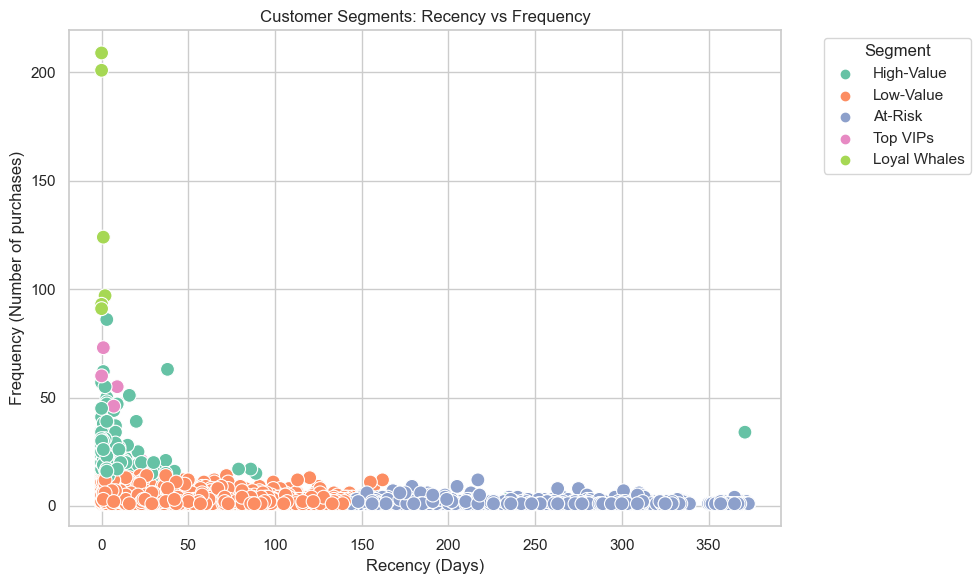

In [130]:
plt.figure(figsize = (10,6))
sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue = 'Segment', palette = 'Set2', s=100)
plt.title('Customer Segments: Recency vs Frequency')
plt.xlabel('Recency (Days)')
plt.ylabel('Frequency (Number of purchases)')
plt.legend(title = 'Segment', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.grid(True)
plt.tight_layout()
plt.show

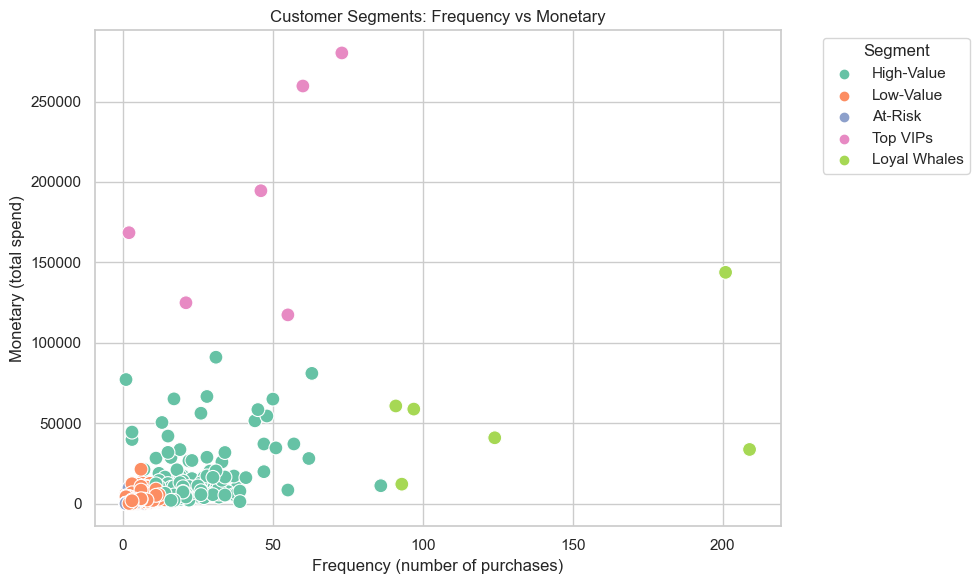

In [132]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Segment', palette='Set2', s=100)
plt.title("Customer Segments: Frequency vs Monetary")
plt.xlabel("Frequency (number of purchases)")
plt.ylabel("Monetary (total spend)")
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

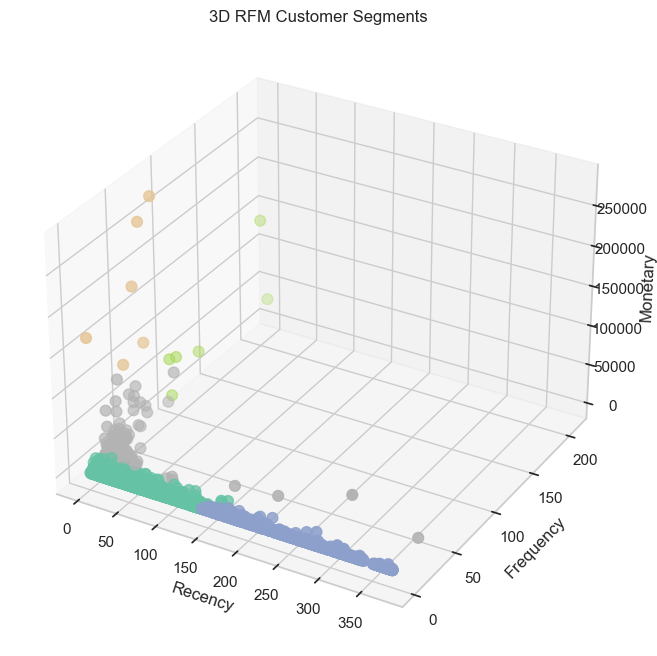

In [136]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    rfm['Recency'], rfm['Frequency'], rfm['Monetary'],
    c=rfm['Cluster'], cmap='Set2', s=60
)

ax.set_title("3D RFM Customer Segments")
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")
plt.show()

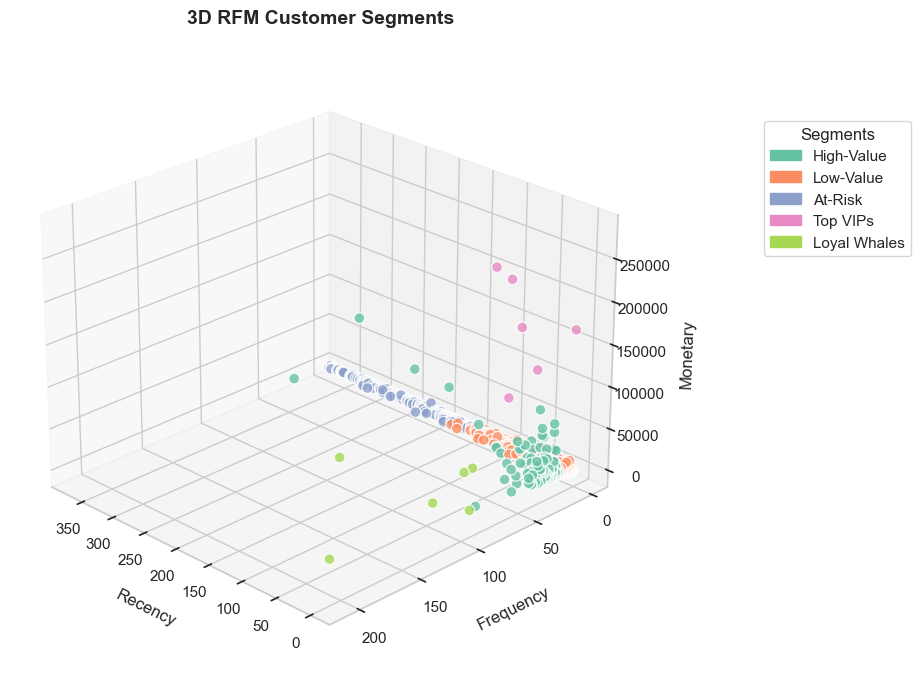

In [142]:
#Trying to improve the visualization and also adding the legends for better understanding
# Create a colormap that maps cluster to color
cluster_labels = rfm['Segment'].unique()
color_map = {
    label: color for label, color in zip(cluster_labels, plt.cm.Set2.colors)
}

# Map segment to color
colors = rfm['Segment'].map(color_map)

# Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    rfm['Recency'],
    rfm['Frequency'],
    rfm['Monetary'],
    c=colors,
    s=60,
    alpha=0.8,
    edgecolor='w'
)

ax.set_title("3D RFM Customer Segments", fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel("Recency", labelpad=10)
ax.set_ylabel("Frequency", labelpad=10)
ax.set_zlabel("Monetary", labelpad=10)
ax.view_init(elev=25, azim=135)  # Adjust viewing angle

# Add legend manually
legend_patches = [
    mpatches.Patch(color=color_map[seg], label=seg)
    for seg in cluster_labels
]
ax.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1.2, 0.9), title="Segments")

plt.tight_layout()
plt.show()

Now we will try another algorithm (Hierarchical clustering), This will help us validate the robustness of our customer segments by comparing results.

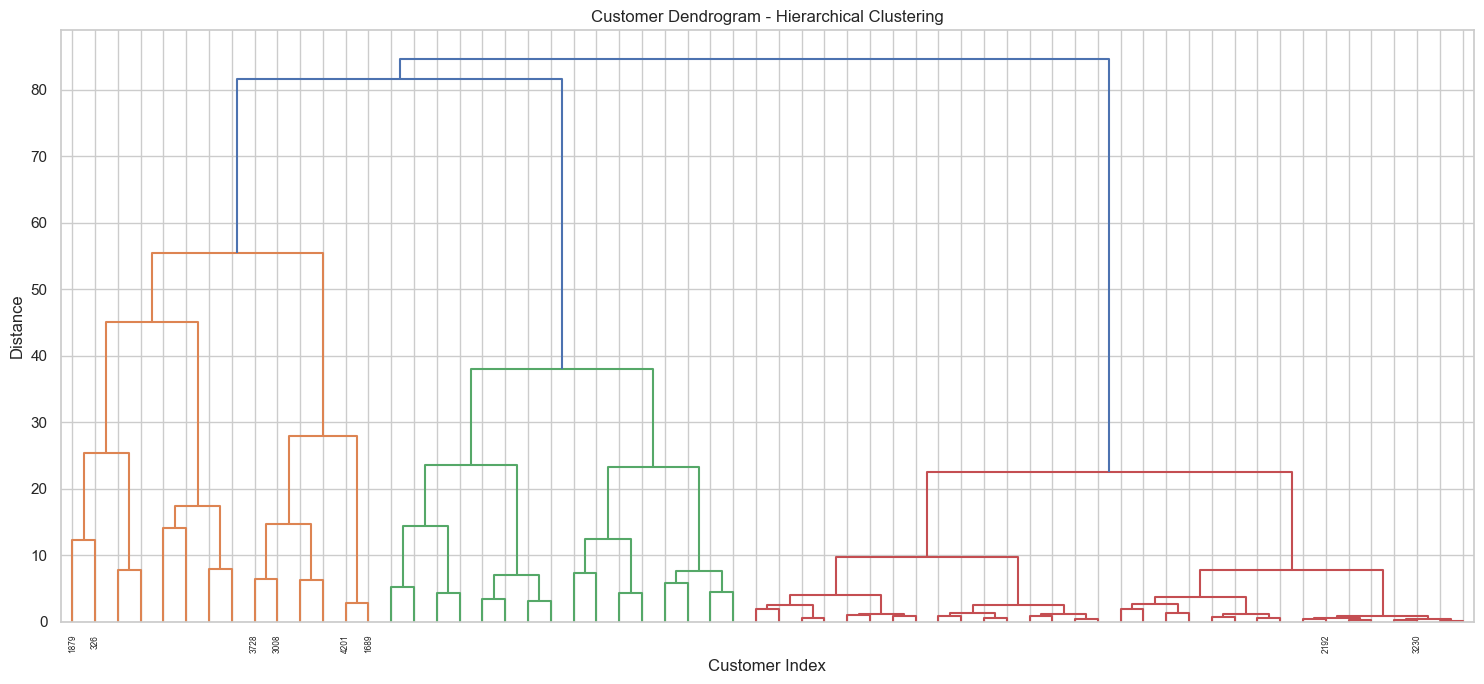

In [151]:
# Use scaled RFM data
linked = linkage(rfm_scaled_df, method='ward')

plt.figure(figsize=(15, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False,
           truncate_mode='level',
           p=5)  # show only top 5 levels

plt.title("Customer Dendrogram - Hierarchical Clustering")
plt.xlabel("Customer Index")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

In [155]:
# Cut the dendrogram to form flat clusters (e.g., 5 clusters)
hier_clusters = fcluster(linked, 5, criterion='maxclust')

# Add to RFM DataFrame
rfm['HierCluster'] = hier_clusters

# Compare with KMeans
rfm.groupby('HierCluster')[['Recency', 'Frequency', 'Monetary']].mean().round(1)

,Recency,Frequency,Monetary
HierCluster,,,
1,258.5,1.5,457.3
2,45.2,4.3,1625.5
3,10.0,43.9,164658.5
4,27.2,31.7,28449.7
5,0.9,128.7,51639.5


#Lets Understand the Dendrogram and the Table

*Dendrogram Interpretation:*
- Each leaf node = a customer
- Branches show how customers are merged into clusters based on similarity
- Height of merge = distance or dissimilarity between merged groups
- Our cut at k=5 gives 5 Clusters
The large vertical jumps near the top especially around distance = 80+ confirms that 5 clusters is a sensible choice beyond that, we'd combining very different groups

| Hier Cluster    | Closest KMeans Segment             |
| --------------- | ---------------------------------- |
| 1 → At-Risk     | KMeans Cluster 1 (Recency = 247.1) |
| 3 → VIPs        | KMeans Cluster 3 (Recency = 6.7)   |
| 5 → Whales      | KMeans Cluster 2 (Recency = 0.5)   |
| 4 → High-Value  | KMeans Cluster 4                   |
| 2 → Low/Regular | KMeans Cluster 0               

This validates that our KMeans clustering is solid — the clusters are consistent across two very different algorithms. For us that’s an excellent evidence for final segmentation.

*Conclusion*
- Both models  support 5 segments with very similar RFM profiles
- Either clustering method can be used in the Streamlit App

*We will use Kmeans clustering for our Streamlit App since it is faster and easier to integrate for real-time prediction*    |


In [225]:
# Saving the trained model
joblib.dump(kmeans, "kmeans_rfm_model.pkl")

['kmeans_rfm_model.pkl']

In [227]:
# Save the scaler as well (important for standardizing new input)
joblib.dump(scaler, "scaler_rfm.pkl")

['scaler_rfm.pkl']

In [229]:
joblib.dump(similarity_df, "similarity_matrix.pkl")

['similarity_matrix.pkl']

In [231]:
joblib.dump(product_lookup, "product_lookup.pkl")

['product_lookup.pkl']

# To run the Stream lit app:
- Open the Anaconda prompt
- Activate the project environment: conda activate shopperenv
- We should see: (shopperenv) C:\Users\shail_u9zs758>
- Navigate to our project folder: cd "C:\Users\shail_u9zs758\OneDrive\Desktop\shopper_spectrum_app"
- run the app: streamlit run app.py

**Important** We need to keep the terminal open to run the app